# ```Experiment``` class for live in-line plotting with jupyter
This example uses the ```Experiment``` class to create a measurement from a ```procedure``` object.

In [6]:
%%writefile procedures.py
import random
from time import sleep

import logging
log = logging.getLogger('')
log.addHandler(logging.NullHandler())

from pymeasure.experiment import Procedure, IntegerParameter, Parameter, FloatParameter

class TestProcedure(Procedure):

    iterations = IntegerParameter('Loop Iterations', default=100)
    delay = FloatParameter('Delay Time', units='s', default=0.2)
    seed = Parameter('Random Seed', default='12345')

    DATA_COLUMNS = ['Iteration', 'Random Number']

    def startup(self):
        log.info("Setting up random number generator")
        random.seed(self.seed)

    def execute(self):
        log.info("Starting to generate numbers")
        for i in range(self.iterations):
            input("dfsd")
            data = {
                'Iteration': i,
                'Random Number': random.random()
            }
            log.debug("Produced numbers: %s" % data)
            self.emit('results', data)
            self.emit('progress', 100.*i/self.iterations)
            sleep(self.delay)
            if self.should_stop():
                log.warning("Catch stop command in procedure")
                break

    def shutdown(self):
        log.info("Finished")

Overwriting procedures.py


In [10]:
from pymeasure.experiment import Experiment
from procedures import TestProcedure
%matplotlib inline

In [11]:
experiment = Experiment('test', TestProcedure(iterations=100, delay=.1))

10:41:50 PM: Setting parameter iterations to 100 (root, INFO)
10:41:50 PM: Setting parameter iterations to 100 (root, INFO)
10:41:50 PM: Setting parameter delay to 0.1 (root, INFO)
10:41:50 PM: Setting parameter delay to 0.1 (root, INFO)
10:41:50 PM: Using data file: /var/folders/68/0fgpgzbn3ts20tpfxvtytlkc0000gn/T/tmpd4ccro7u (root, INFO)
10:41:50 PM: Using data file: /var/folders/68/0fgpgzbn3ts20tpfxvtytlkc0000gn/T/tmpd4ccro7u (root, INFO)
10:41:50 PM: Using data file: /var/folders/68/0fgpgzbn3ts20tpfxvtytlkc0000gn/T/tmpd4ccro7u (root, INFO)
10:41:51 PM: Set up Results (root, INFO)
10:41:51 PM: Set up Results (root, INFO)
10:41:51 PM: Set up Results (root, INFO)
10:41:51 PM: Create worker (root, INFO)
10:41:51 PM: Create worker (root, INFO)
10:41:51 PM: Create worker (root, INFO)


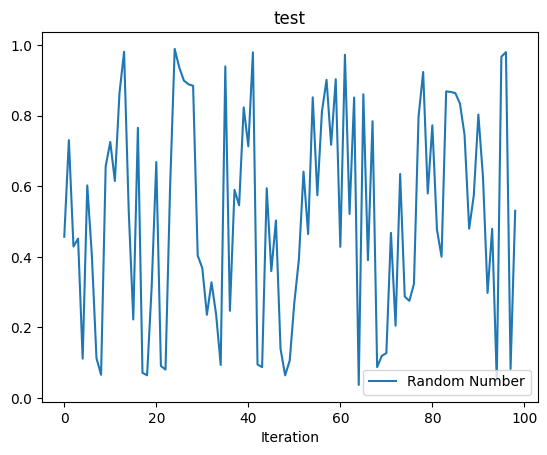

In [12]:
experiment.start()
experiment.plot_live('Iteration', 'Random Number')